## Predictions (Meredith's Version)
Heavily stolen from Konstantin's code

In [1]:
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

from sklearn.linear_model import LinearRegression
from scipy.fft import fft, rfftfreq, rfft

import prediction_functions as pf

In [2]:
#get data and a summary
df = pd.read_csv("data/tcatlantic.csv")
df.describe()

,Year,Tropical Storms,Hurricanes,Major Hurricanes
count,172.000000,172.000000,172.000000,172.000000
mean,1936.500000,9.819767,5.534884,1.959302
std,49.796252,4.548255,2.603181,1.694013
min,1851.000000,1.000000,0.000000,0.000000
25%,1893.750000,6.000000,4.000000,1.000000
50%,1936.500000,9.000000,5.000000,2.000000
75%,1979.250000,12.000000,7.000000,3.000000
max,2022.000000,30.000000,15.000000,7.000000


In [26]:
#calculate avg and create list to make climatology data set
avg = df["Tropical Storms"].mean()
climatology = [avg]*172
#print(climatology)

In [48]:
#rmse

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

climatology = np.full((172,),avg)
#print(climatology)
trop = df["Tropical Storms"].values.tolist()


rootmean = rmse(climatology,trop)

print(rootmean)

4.535014160318444


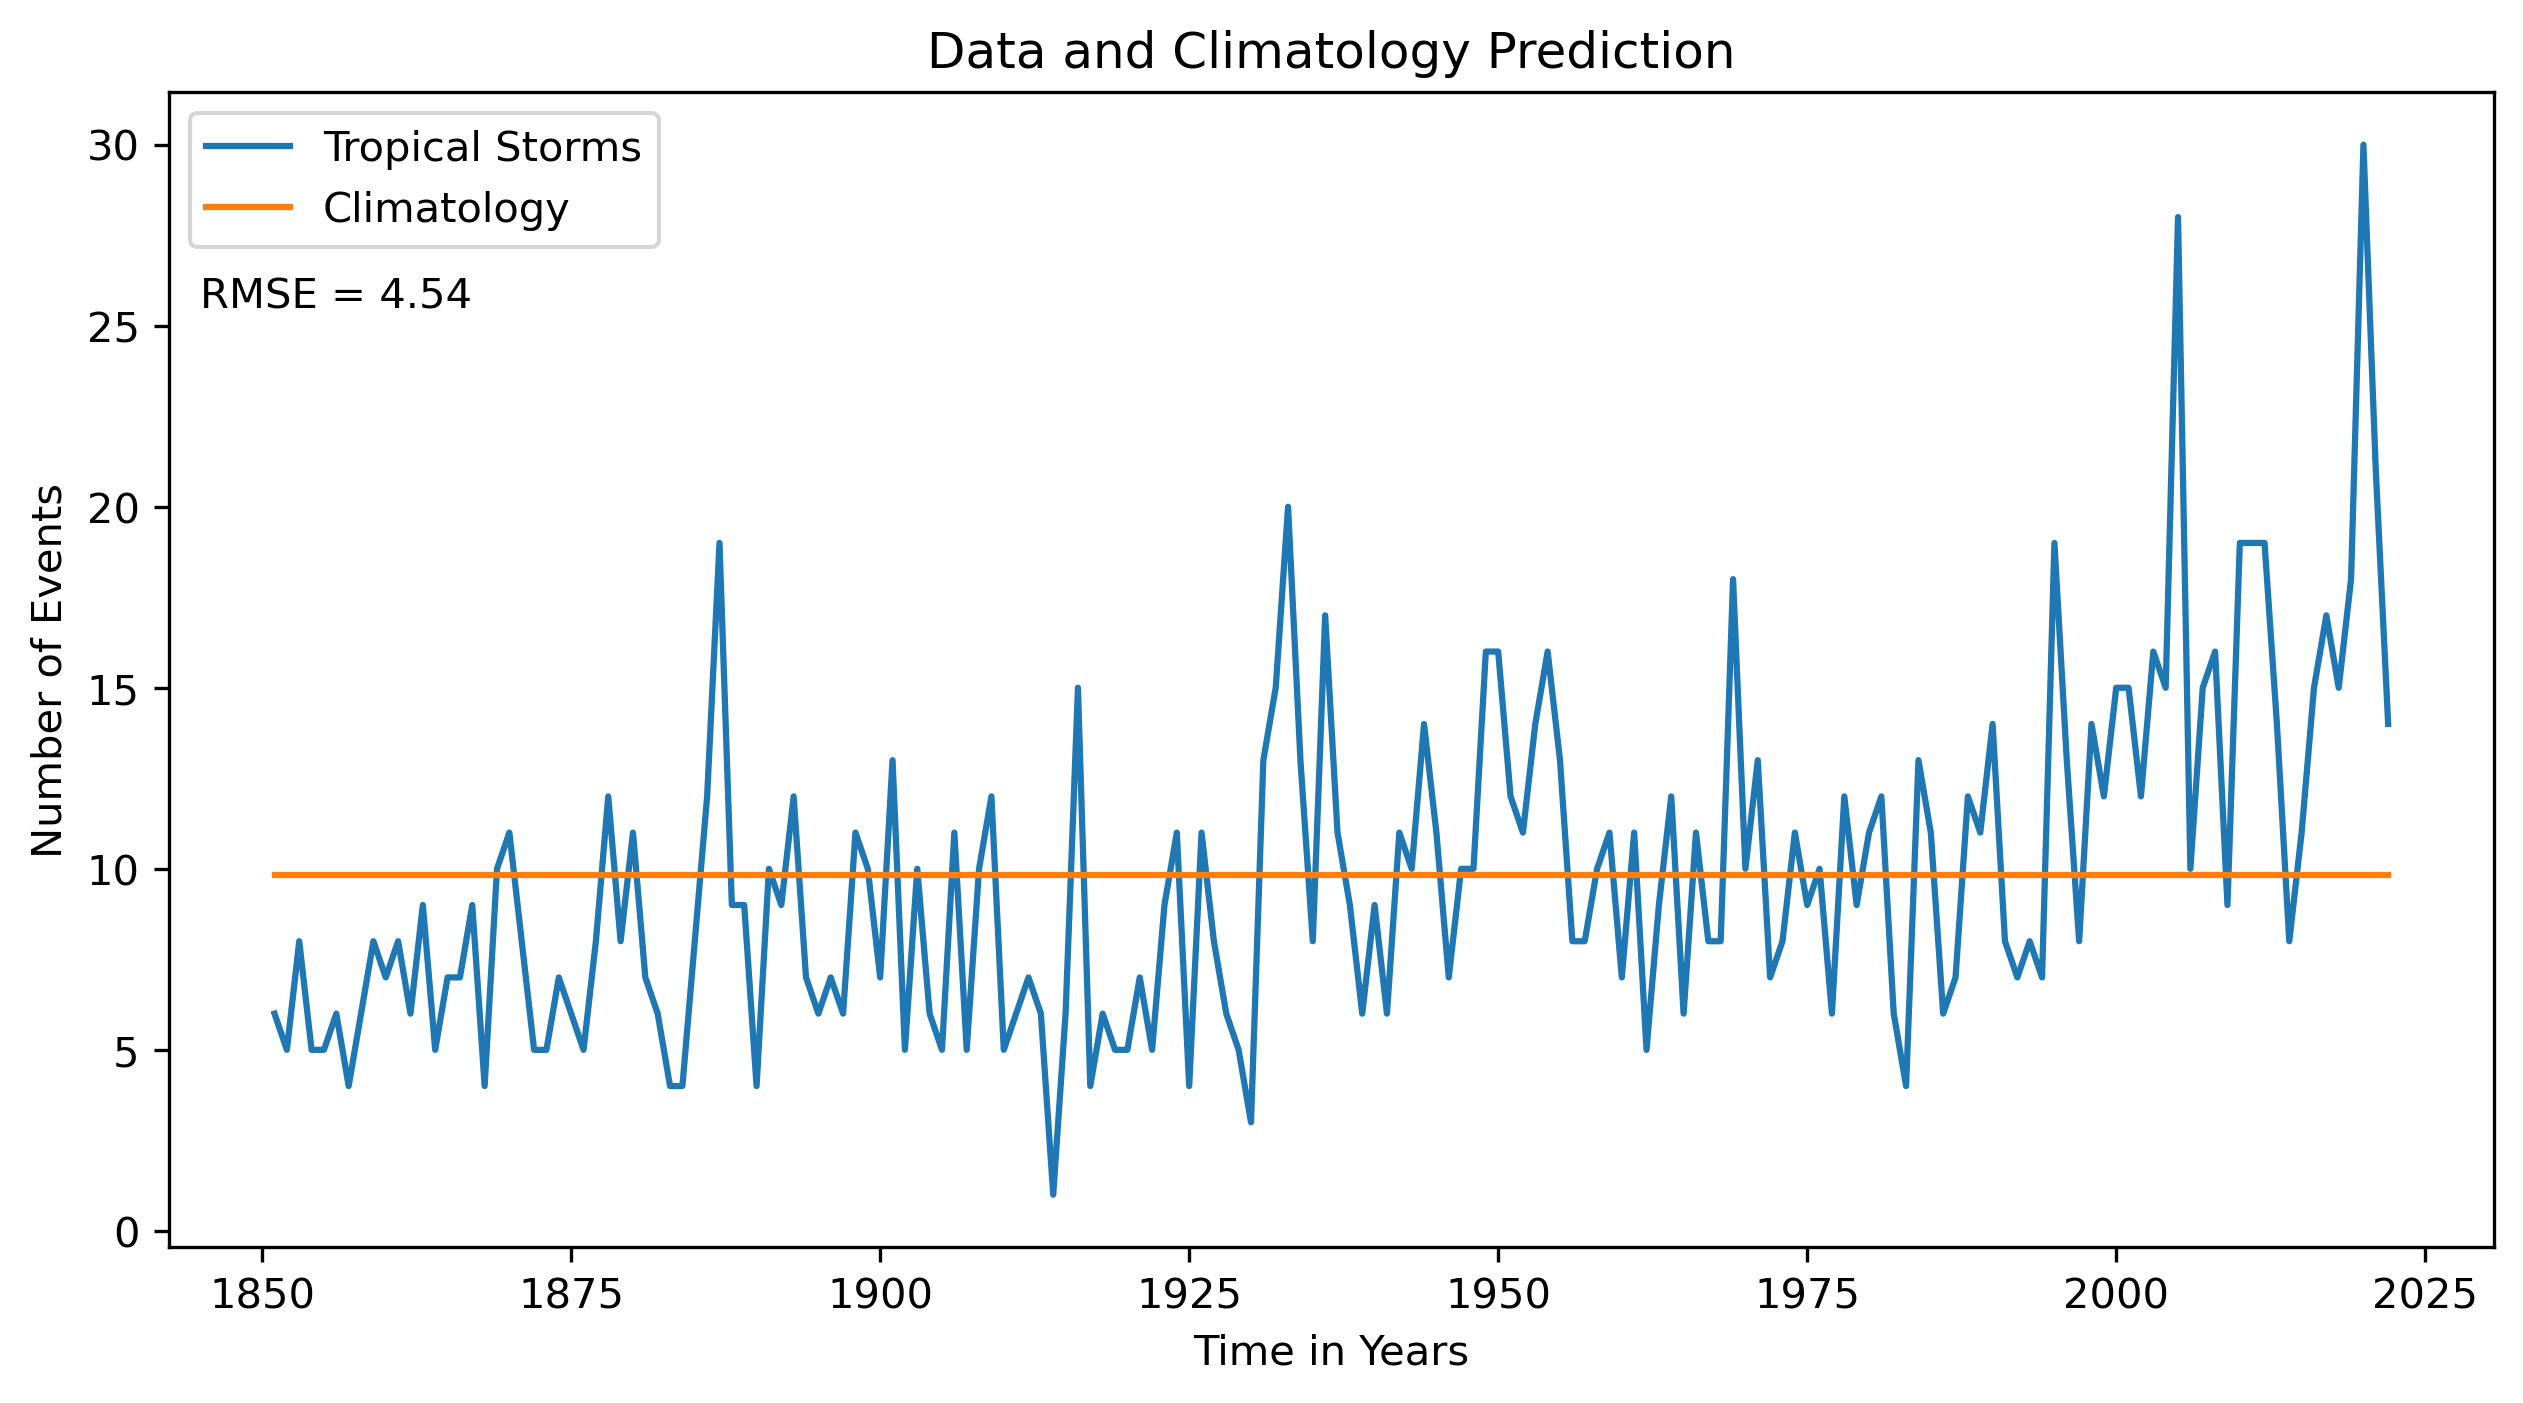

In [55]:
#plot figure of climatology and dataset
plt.figure(figsize = (10,5),dpi = 300)
plt.plot(df["Year"],df["Tropical Storms"], label = "Tropical Storms")
plt.plot(df["Year"], climatology, label = "Climatology")
plt.text(1845,25.5,"RMSE = 4.54")
plt.xlabel("Time in Years")
plt.ylabel("Number of Events")
plt.title("Data and Climatology Prediction")
plt.legend()